# 1D GP Regression Demo

In [1]:
import sys
sys.path.insert(0,'/home/emmanuel/projects/2019_sakame')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from src.data.make_dataset import ToyData
from src.models.regression import gpr_naive
from src.models.derivatives import GPRDerivative

%load_ext autoreload
%autoreload 2

## Load Sample Data

We have a few options regarding the sample functions:

* Linear
* Sin
* Sinc
* Polynomial
* X Sin

In [5]:
num_points = 500
noise = 0.2
num_points = 75
func = 'sin'
degree = 2
random_state = 123

x = np.linspace(-20, 20, num_points)

y = ToyData().regress_f(
    x,
    func=func,
    noise=noise,
    degree=degree,
    random_state=random_state
)

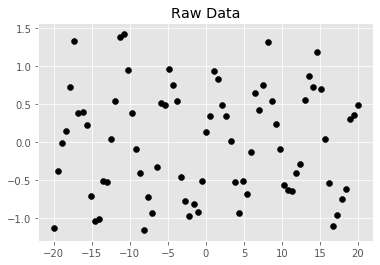

In [6]:
fig, ax = plt.subplots()

ax.scatter(x, y, color='Black')
ax.set_title('Raw Data')
plt.show()

## Train GP

In [7]:
gpr_model = gpr_naive(x[:, None], y[:, None], n_restarts_optimizer=10, normalize_y=True, random_state=123)

In [8]:
gpr_model.kernel_.get_params()

{'k1': 0.954**2 * RBF(length_scale=1.78),
 'k2': WhiteKernel(noise_level=0.0474),
 'k1__k1': 0.954**2,
 'k1__k2': RBF(length_scale=1.78),
 'k1__k1__constant_value': 0.9108289807876779,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 1.7822980507695358,
 'k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k2__noise_level': 0.04735060188921263,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

In [9]:
ypred, y_std = gpr_model.predict(x[:, None], return_std=True)

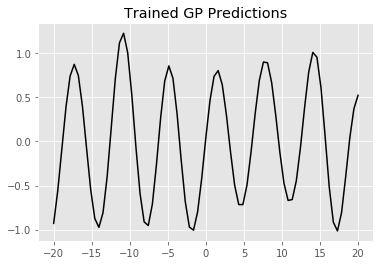

In [10]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='Black')
ax.set_title('Trained GP Predictions')
plt.show()

## Derivative

In [11]:
gpr_der = GPRDerivative(gpr_model)

x_der = gpr_der(x[:, None])

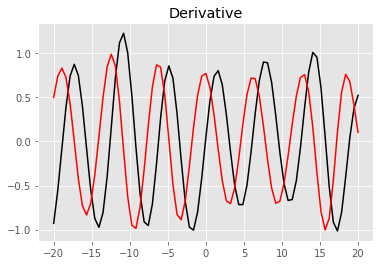

In [12]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='black')
ax.plot(x, x_der, color='red')
ax.set_title('Derivative')

plt.show()

## Sensitivity

In [13]:
x_der.shape

(75, 1)

In [14]:
x_sens = (x_der**2).mean(axis=1)

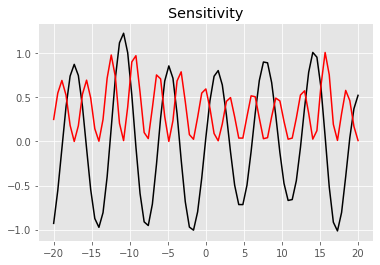

In [15]:
fig, ax = plt.subplots()


ax.plot(x, ypred, color='black')
ax.plot(x, x_sens, color='red')
ax.set_title('Sensitivity')

plt.show()

## For All Functions

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


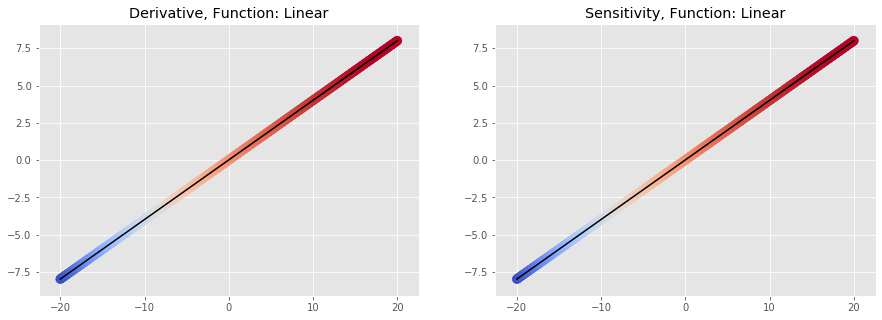

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


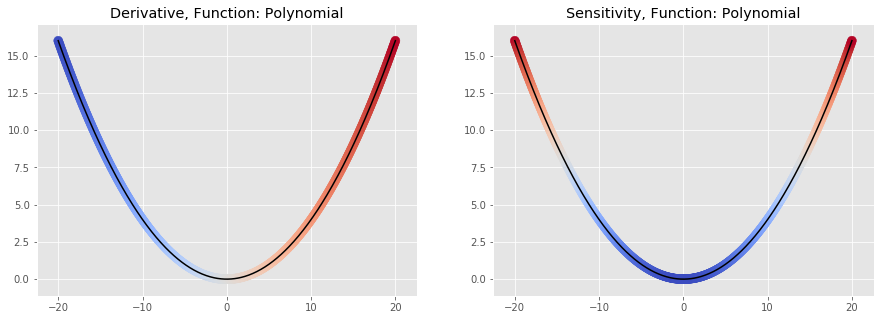

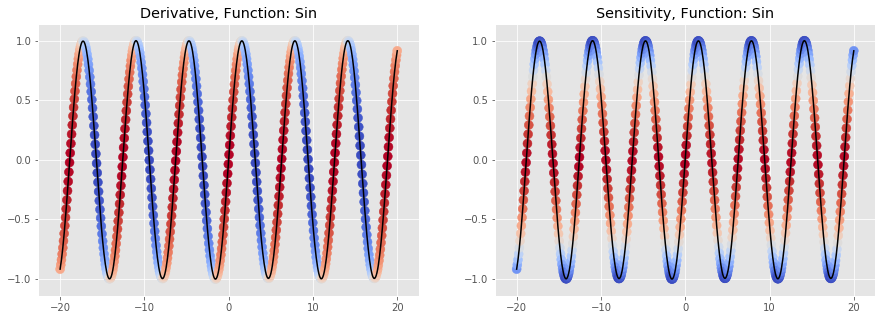

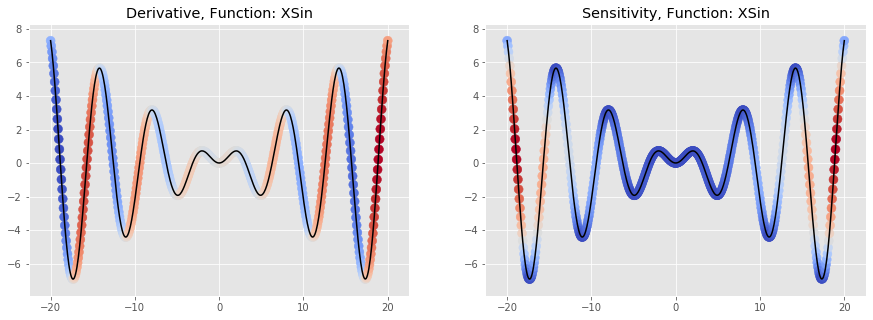

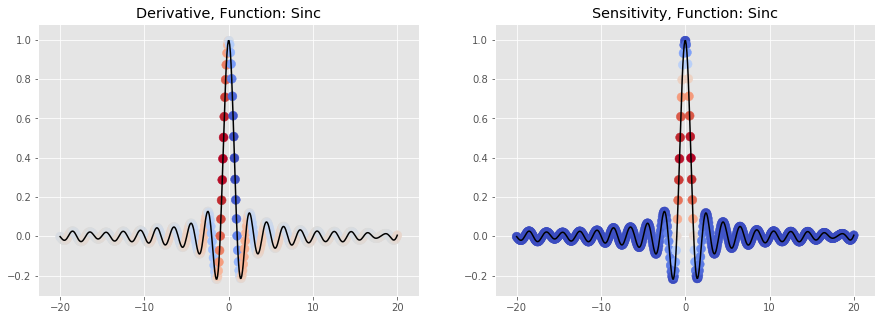

In [16]:
num_points = 500
noise = 0.01
colormap = plt.cm.get_cmap('coolwarm')
funcs = ['lin', 'poly', 'sin', 'xsin', 'sinc']
func_names = ['Linear', 'Polynomial', 'Sin', 'XSin', 'Sinc']

for (iteration, ifunc) in enumerate(funcs):
    # Initialize Demo Class
    x = np.linspace(-20, 20, num_points)

    y = ToyData().regress_f(
        x,
        func=ifunc,
        noise=noise,
        degree=degree,
        random_state=random_state
    )
    
    x = x[:, None]
    y = y[:, None]
        
    # Train GP
    gpr_model = gpr_naive(x, y, n_restarts_optimizer=10, normalize_y=True, random_state=123)
    
    # Predict test points
    ypred, y_std = gpr_model.predict(x, return_std=True)
    
    # Calculate the Derivative
    gpr_der = GPRDerivative(gpr_model)
    x_der = gpr_der(x)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    ax[0].plot(x, ypred, color='black')
    ax[0].scatter(x.squeeze(), ypred.squeeze(), s=80, c=x_der.squeeze(), cmap=colormap)
    ax[0].set_title(f"Derivative, Function: {func_names[iteration]}")

    
    # Calculate the Sensitivity
    x_sens = (x_der**2).mean(axis=1)
    
    ax[1].plot(x, ypred, color='black')
    ax[1].scatter(x.squeeze(), ypred.squeeze(), s=80, c=x_sens.squeeze(), cmap=colormap)
    ax[1].set_title(f"Sensitivity, Function: {func_names[iteration]}")

    plt.show()